# Nasa - Asteroids classification

Esse notebook faz parte do trabalho da disciplina de Arquitetura de dados, ministrado pelo Prof. Dr. Dieval Guizelini, do curso de Pós Graduação em Inteligência Artificial Aplicada da UFPR.

O objetivo é aplicar técnicas de pré processamento de dados com a finalidade de melhorar a primeira classificação feita sem tais técnicas.

Usaremos a base de classificação de asteróides presente em: https://www.kaggle.com/shrutimehta/nasa-asteroids-classification.

**Alunos:** Luiza R. Marinho e Tiago J. da Silva

---

## 1. Para começar

A base escolhida é a base de classificação de asteróides próximos à Terra entre entre perigosos (com risco de colisão com a Terra) e não perigosos. *NEO* nesse contexto é o acrônimo para *Near Earth Object* e a página https://cneos.jpl.nasa.gov/about/neo_groups.html apresenta mais detalhes para aprofundamento.

**Característica da base**

- Essa base possui **4687 padrões**;
- A base possui **40 atributos**, sendo 39 features e 1 atributo classificador;
- Os padrões estão divididos entre **duas classes**;
- As classes presentes são **True** (risco de colisão) e **False** (sem risco de colisão);
- O atributo que representa a classe é Hazardous;
- **Há um problema de prevalência** tendo que a classe True concentra 84% dos padrões enquanto a classe False os 16% restantes;

**Tecnologias usadas**

- Python
- Scikit Learn framework

### Leitura da base

In [69]:
import pandas as pd

In [70]:
neo_df = pd.read_csv('nasa-asteroides-database.csv', sep = ',', engine = 'python', 
                            parse_dates=['Close Approach Date', 'Orbit Determination Date'])

In [71]:
neo_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Análise descritiva

#### Descrição dos atributos

| Atributo | Definição* | Tipo de dado |
| :--- | :--- | :--- |
| Neo Reference ID | Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth| Nominal |
| Name | 'Name' of asteroid (same as NEO Reference ID) | Nominal |
| Absolute Magnitude | A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees) | Nominal |
| Est Dia in KM(min) | Minimum estimated diameter of the asteroid in KM | Nominal |
| Est Dia in KM(max) | Maximum estimated diameter of the asteroid in KM | Nominal |
| Est Dia in M(min) | Minimum estimated diameter of the asteroid in M | Nominal |
| Est Dia in M(max) | Maximum estimated diameter of the asteroid in M | Nominal |
| Est Dia in Miles(min) | Minimum estimated diameter of the asteroid in Miles | Nominal |
| Est Dia in Miles(max) | Maximum estimated diameter of the asteroid in Miles | Nominal |
| Est Dia in Feet(min) | Minimum estimated diameter of the asteroid in Feet | Nominal |
| Est Dia in Feet(max) | Maximum estimated diameter of the asteroid in Feet | Nominal |
| Close Approach Date | Date at which the asteroid approaches close to Earth | Nominal |
| Epoch Date Close Approach | Date at which the asteroid approaches close to Earth (in epoch time) | Nominal |
| Relative Velocity km per sec | Asteroid's velocity relative to earth in km per sec | Nominal |
| Relative Velocity km per hr | Asteroid's velocity relative to earth in km per hr | Nominal |
| Miles per hour | Asteroid's velocity relative to earth in miles per hour | Nominal |
| Miss Dist.(Astronomical) | Distance by which the asteroid misses Earth in astronomical | Nominal |
| Miss Dist.(lunar) | Distance by which the asteroid misses Earth in lunar | Nominal |
| Miss Dist.(kilometers) | Distance by which the asteroid misses Earth in km) | Nominal |
| Miss Dist.(miles) | Distance by which the asteroid misses Earth in miles | Nominal |
| Orbiting Body | Name of orbited body | Nominal |
| Orbit ID | An ID of JPL NEA orbit that JPL Nasa uses in its analysis | Nominal |
| Orbit Determination Date | Date at which the asteroid's orbit was determined | Nominal |
| Orbit Uncertainity | A measure of the uncertainity ('measurement errors') in the calculated orbit | Nominal |
| Minimum Orbit Intersection | The closest distance between Earth and the asteroid in their respective orbits (in astronomical units) | Nominal |
| Jupiter Tisserand Invariant | A value used to differentiate between asteroids and Jupiter-family comets | Nominal |
| Epoch Osculation | The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified | Nominal |
| Eccentricity | A value which specifies by how much the asteroid's orbit deviates from a perfect circle | Nominal |
| Semi Major Axis | The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun (asteroids orbit the Sun) | Nominal |
| Inclination | Measures the tilt of the asteroid's orbit around the Sun | Nominal |
| Asc Node Longitude | (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node' | Nominal |
| Orbital Period | Time taken for asteroid to complete a single orbit around the Sun | Nominal |
| Perihelion Distance | Distance of point in asteroid's orbit which is closest to the Sun | Nominal |
| Perihelion Arg | (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit' | Nominal |
| Aphelion Dist | Distance of point in asteroid's orbit which is farthest from the Sun | Nominal |
| Perihelion Time | Length of time of asteroid's passage through the perihelion stage | Nominal |
| Mean Anomaly | (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage') | Nominal |
| Mean Motion | (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis' | Nominal |
| Equinox | An astronomical standard to measure against (currently 'J2000.0') | Nominal |
| Hazardous | Is the asteroid hazardous? (True or False) | Nominal |

*Fonte: https://www.kaggle.com/kaggleuser654/is-the-asteroid-hazardous

#### Padrões por classe:

In [72]:
neo_df['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

#### Estatísticas

In [73]:
neo_df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


#### Relação entre atributos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

colunas = list(neo_df.head())
colunas = colunas[0:-1]
nomeColunas = sorted(colunas) 
numColunas = len(nomeColunas)
fig, ax = plt.subplots(numColunas, numColunas, figsize=(100, 100), constrained_layout = False)

for lin in range(0, numColunas):
    for col in range(0,numColunas): 
        ax[lin,col].scatter(x = neo_df[nomeColunas[col]], y = neo_df[nomeColunas[lin]],s = 4) 
        ax[lin,col].set(xticks = [], yticks = [], xlabel = nomeColunas[col], ylabel = nomeColunas[lin])
        
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None) 
corr = neo_df.corr()

plt.subplots(figsize=(80, 80)) 
sn.heatmap(corr, annot = True) 
plt.show()

------

## 2. Primeira classificação

Precisaremos adaptar minimamente os dados pois a classificador que usaremos, o SVM, aceita apenas features numéricas. No nosso dataframe temos duas features categóricas: **Orbiting Body** e **Equinox**. Além deles há dois campos que armazenam datas: **Orbit Determination Date** e **Close Approach Date**, como podemos ver abaixo:

In [74]:
neo_df[['Orbit Determination Date', 'Close Approach Date', 'Orbiting Body', 'Equinox']].head()

,Orbit Determination Date,Close Approach Date,Orbiting Body,Equinox
0,2017-04-06 08:36:37,1995-01-01,Earth,J2000
1,2017-04-06 08:32:49,1995-01-01,Earth,J2000
2,2017-04-06 09:20:19,1995-01-08,Earth,J2000
3,2017-04-06 09:15:49,1995-01-15,Earth,J2000
4,2017-04-06 08:57:58,1995-01-15,Earth,J2000


Para conseguir executar nosso classificador precisaremos:

- Remover os campos de data
- Converter os valores categórios em valores numéricos.

Essas duas ações já representam ações de pré-processamento.

#### Remoção dos campos de data

In [75]:
neo_df.drop('Orbit Determination Date', 1, inplace = True)
neo_df.drop('Close Approach Date', 1, inplace = True)

#### Codificação de features categóricas

In [76]:
orbiting_body_factor = pd.factorize(neo_df['Orbiting Body'])
equinox_factor = pd.factorize(neo_df['Equinox'])

In [77]:
neo_df['Orbiting Body'] = orbiting_body_factor[0]
neo_df['Equinox'] = equinox_factor[0]

### Definição das features

In [78]:
features = neo_df.columns.tolist()
features = features[0:-1]
pd.DataFrame({'Feature':features})

,Feature
0,Neo Reference ID
1,Name
2,Absolute Magnitude
3,Est Dia in KM(min)
4,Est Dia in KM(max)
5,Est Dia in M(min)
6,Est Dia in M(max)
7,Est Dia in Miles(min)
8,Est Dia in Miles(max)
9,Est Dia in Feet(min)


### Separação de dados entre Treino e Teste

Separaremos 80% dos padrões para treino e 20% dos para teste

In [79]:
from sklearn.model_selection import train_test_split 

neo_features_df = neo_df.iloc[:,:-1]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.2, random_state = 1, stratify = neo_classes_df)

Por conta do desbalanceamento presente na base, usamos o parâmetro *stratify* que mantém a proporcionalidade das classes na criação dos subconjuntos de treino e teste.

In [80]:
classes_train.value_counts()

False    3145
True      604
Name: Hazardous, dtype: int64

### Classificação

In [81]:
from sklearn import svm

clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

### Métricas

##### Matriz de confusão

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

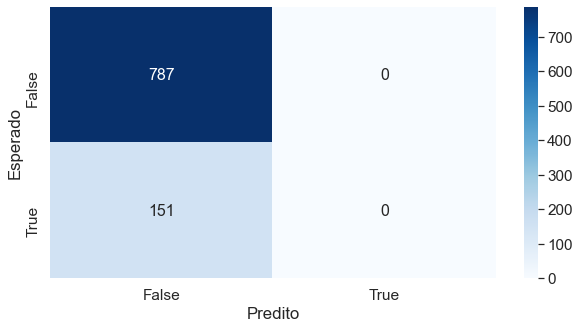

In [82]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(classes_test, predicted)

cm_df = pd.DataFrame(cm, columns = np.unique(classes_test), index = np.unique(classes_test))
cm_df.index.name = 'Esperado'
cm_df.columns.name = 'Predito'
plt.figure(figsize = (10,5))
sn.set(font_scale = 1.4)
sn.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

##### Report classification

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia: %.2f' % accuracy_score(classes_test, predicted))
print('Precisão: %.2f' % precision_score(classes_test, predicted, zero_division = False))
print('Recall: %.2f' % recall_score(classes_test, predicted, zero_division = False))
print('F-sore: %.2f' % f1_score(classes_test, predicted, zero_division = False))

Acurácia: 0.84
Precisão: 0.00
Recall: 0.00
F-sore: 0.00


In [35]:
from sklearn import metrics

print(metrics.classification_report(classes_test, predicted, zero_division = False))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1175
        True       0.00      0.00      0.00       232

    accuracy                           0.84      1407
   macro avg       0.42      0.50      0.46      1407
weighted avg       0.70      0.84      0.76      1407



-----

## 3. Pré-processamento

### Codificação

Anteriormente, no item *2. Primeira classificação*, tivemos que antecipar a etapa de codificação para que o primeiro modelo pudesse ser criado.

Essa etapa consiste em altera valores categóricos valor numéricos. Na ocasião transformamos os valores de **'Orbiting Body'** e **'Equinox'** onde cada valor passou a ser representado por um número.

### Seleção de dados

NASA'a CNEOS defines petentially hazardous asteroids as an asteroid with "a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less". Note: 1 au (astronomical unit) = 149597870700 m (roughly distance between Earth and Sun)

We will plot Minimum Orbit Intersection, Absolute Magnitude, and Hazardous in a scatter plot to see this relationship.

In [84]:
neo_df = neo_df[['Absolute Magnitude', 'Minimum Orbit Intersection', 'Hazardous']]

In [85]:
neo_df.head()

,Absolute Magnitude,Minimum Orbit Intersection,Hazardous
0,21.6,0.025282,True
1,21.3,0.186935,False
2,20.3,0.043058,True
3,27.4,0.005512,False
4,21.6,0.034798,True


### Normalização

In [86]:
from sklearn.preprocessing import robust_scale

neo_df['absolute_magnitude_scaled'] = robust_scale(neo_df['Absolute Magnitude'])
neo_df['minimum_orbit_intersection_scaled'] = robust_scale(neo_df['Minimum Orbit Intersection'])
neo_df = neo_df[[
        'Absolute Magnitude', 
        'Minimum Orbit Intersection', 
        'absolute_magnitude_scaled',
        'minimum_orbit_intersection_scaled',
        'Hazardous'
    ]]

In [87]:
neo_df.head()

,Absolute Magnitude,Minimum Orbit Intersection,absolute_magnitude_scaled,minimum_orbit_intersection_scaled,Hazardous
0,21.6,0.025282,-0.068182,-0.202586,True
1,21.3,0.186935,-0.136364,1.280355,False
2,20.3,0.043058,-0.363636,-0.039516,True
3,27.4,0.005512,1.250000,-0.383949,False
4,21.6,0.034798,-0.068182,-0.115289,True


### Nova classificação

In [88]:
features = ['absolute_magnitude_scaled', 'minimum_orbit_intersection_scaled']

In [94]:
neo_features_df = neo_df[features]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.2, random_state = 1, stratify = neo_classes_df)

In [95]:
clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

#### Métricas

##### Matriz de confusão

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

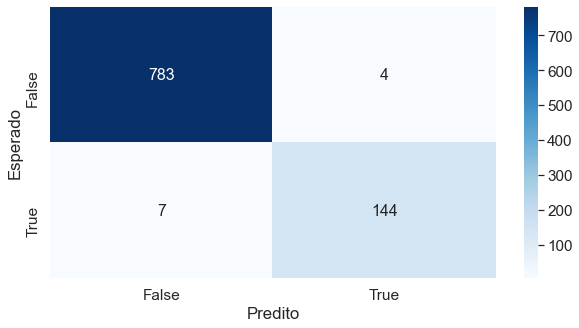

In [96]:
cm = confusion_matrix(classes_test, predicted)

cm_df = pd.DataFrame(cm, columns = np.unique(classes_test), index = np.unique(classes_test))
cm_df.index.name = 'Esperado'
cm_df.columns.name = 'Predito'
plt.figure(figsize = (10, 5))
sn.set(font_scale = 1.4)
sn.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

#### Report Classification

In [97]:
print(metrics.classification_report(classes_test, predicted, zero_division = False))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       787
        True       0.97      0.95      0.96       151

    accuracy                           0.99       938
   macro avg       0.98      0.97      0.98       938
weighted avg       0.99      0.99      0.99       938



##### Acurácia

In [98]:
np.mean(predicted == classes_test)

0.988272921108742

## Todos

- Preencher os tipos de dados (1 - Luiza)

- Fazer as etapas de pré processamento (2 - Tiago)
- - Normalização
- - Codificação
- - Escolha de features

- Analisar se precisamos fazer algo pra corrigir o problema de prevalência (3 - Luiza)

- Fazer o back-propagation e forward-propagation pra comparar (4)

- Analisar os gráficos q estamos usando (5)